<a href="https://colab.research.google.com/github/madhuribonela/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_fresh_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

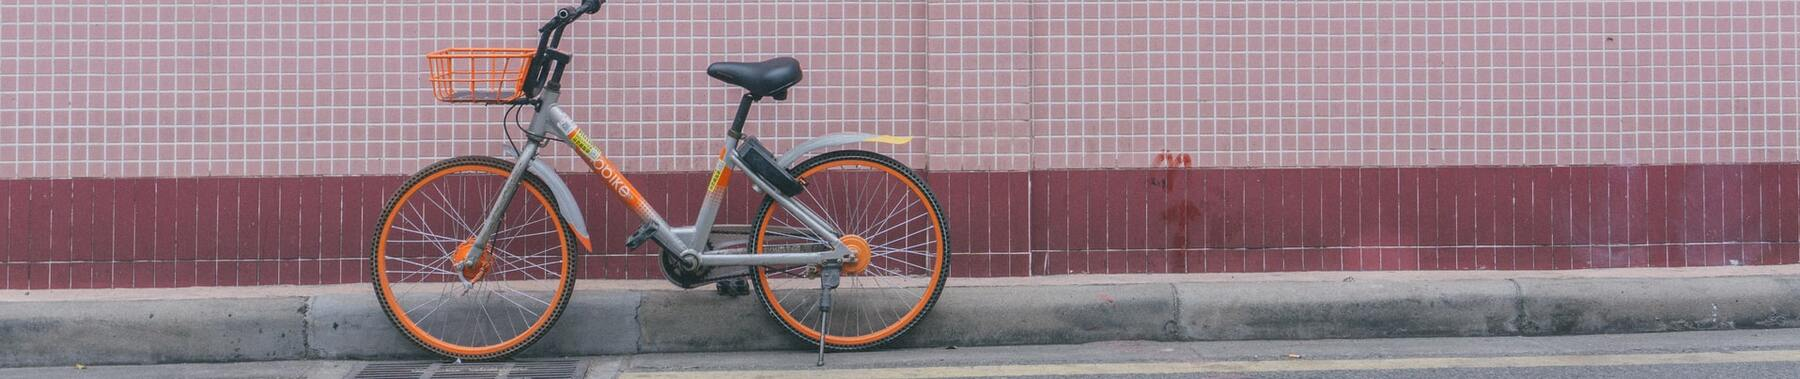

# **First We have to import library which is crutial for our project**

---



---



#  let's import the Librarys 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from xgboost import XGBRegressor

# **Mount the drive and import the datset**

---



---



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DF1=pd.read_csv("/content/drive/MyDrive/Capstone projects/Bike Sharing Demand Prediction fresh - Capstone Project/SeoulBikeData.csv",encoding ='latin')

# **Explore the nature of Data set**

---



---





##  **Viewing the data of top & Bottom5 rows of the data**




---






In [ ]:
DF1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
DF1.tail()
# View the data of bottom 5 rows 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#**Looking for the description of the dataset to get insights of the data**

In [ ]:
DF1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


 

> **This Dataset contains 8760 lines and 14 columns.**



>**In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.**



## **Getting the shape of dataset with rows and columns**

In [ ]:
print(DF1.shape)

(8760, 14)


# **check details about the data set**

In [ ]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **unique value**

In [ ]:
DF1.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **Getting all the columns NAMES**

In [ ]:
print("Features of the dataset:")
DF1.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Rename the complex columns name
DF1=DF1.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

# **Breaking date column**

In [ ]:
# Changing the "Date" column into three "year","month","day" column
DF1['Date'] = DF1['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
DF1['year'] = DF1['Date'].dt.year
DF1['month'] = DF1['Date'].dt.month
DF1['day'] = DF1['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
DF1['weekdays_weekend']=DF1['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
DF1=DF1.drop(columns=['Date','day','year'],axis=1)

In [ ]:
DF1.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  DF1[col]=DF1[col].astype('category')

In [ ]:
DF1.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekdays_weekend            2
dtype: int64

In [ ]:
#let's check the result of data type
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
DF1['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

# **Preprocessing the dataset**

# **Handling to missing Values**

---





## > **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first**



In [ ]:
DF1.isna().sum()
DF1.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64



# **> As we can see above there are no missing value presents**



##**Duplicate values**



> **Checking Duplicate Values**



In [ ]:
value=len(DF1[DF1.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0





> 
**> In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present**





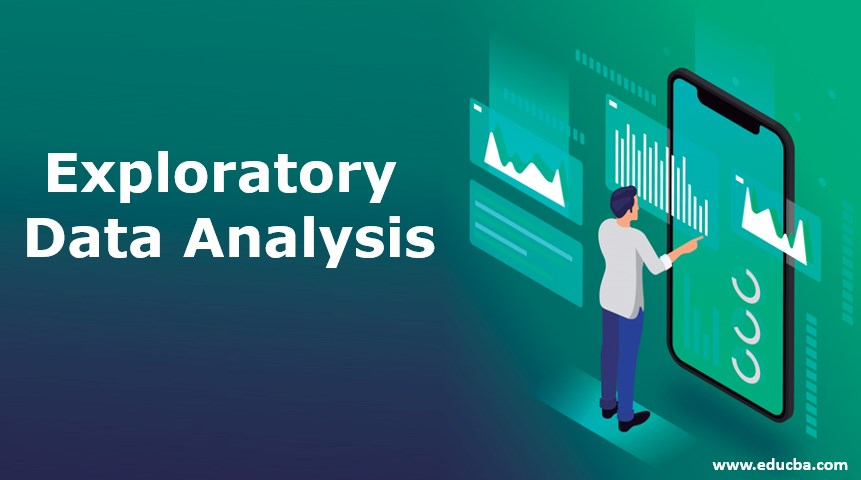)**

# **Exploratory Data Analysis (EDA)**

---



---



# **1. weekdays_weekend Aalysis**

---



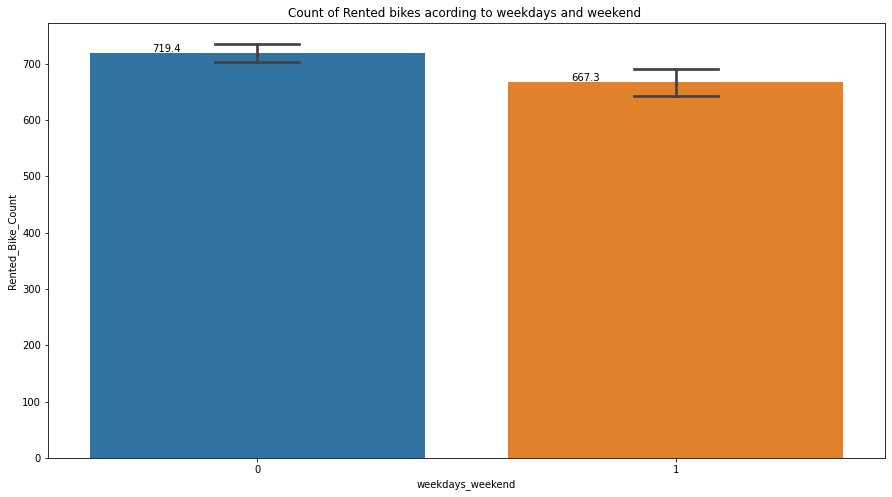

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=DF1,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

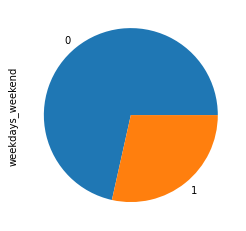

In [ ]:
DF1.weekdays_weekend.value_counts(normalize=True).plot.pie()

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

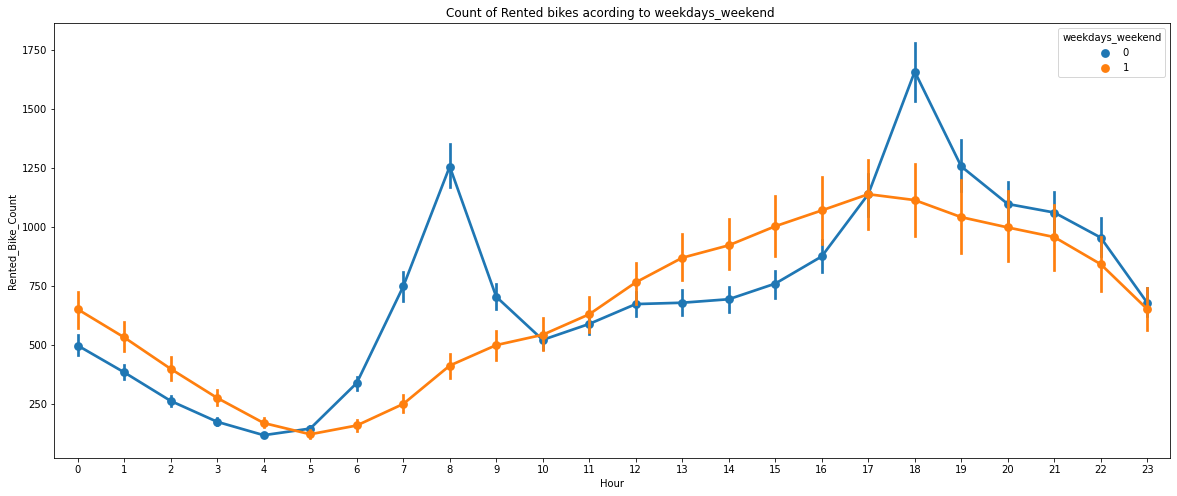

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=DF1,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')
 

# **2.By Hour Analysis**

---



 



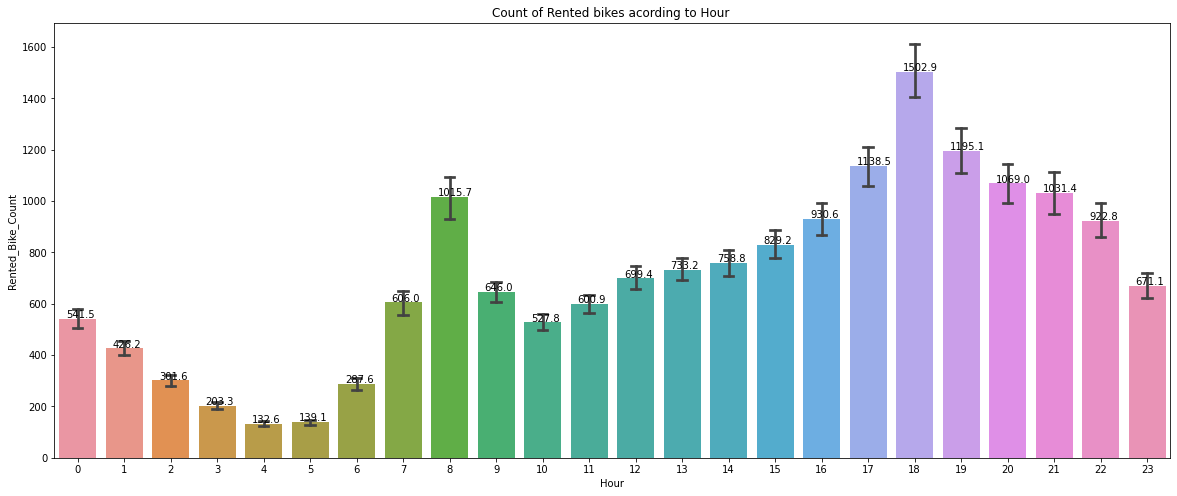

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=DF1,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+3.90))
plt.show()



**1.   In the above plot which shows the use of rented bike according the hours and the data are from all over the year.**

**2.  generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**



# **3.By Month Analysis**

---



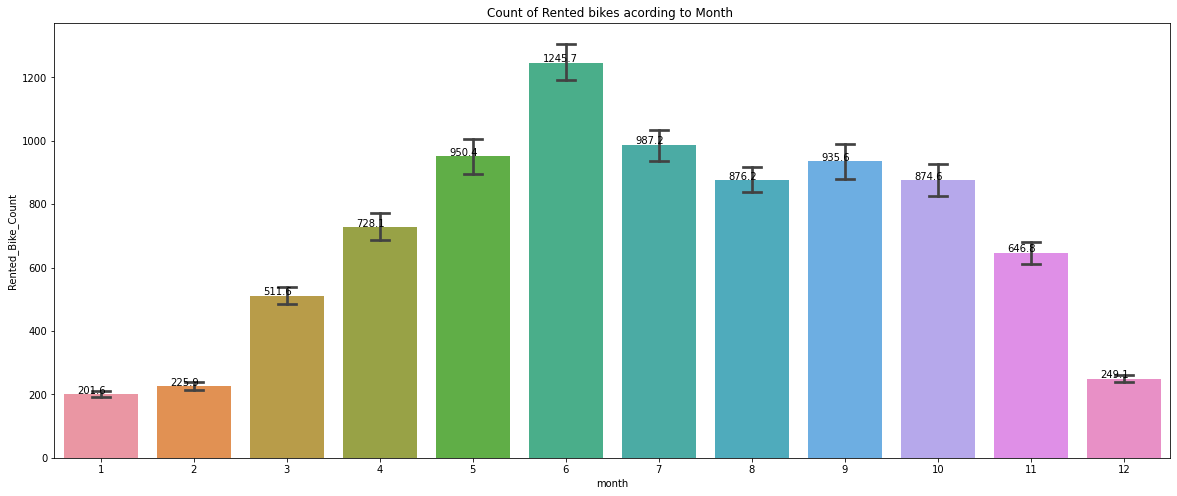

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=DF1,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ') 

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

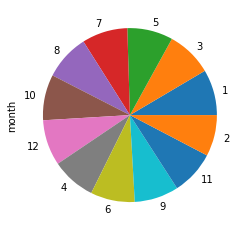

In [ ]:
DF1.month.value_counts(normalize=True).plot.pie()

# **4.On Functioning Day Analysis**

---



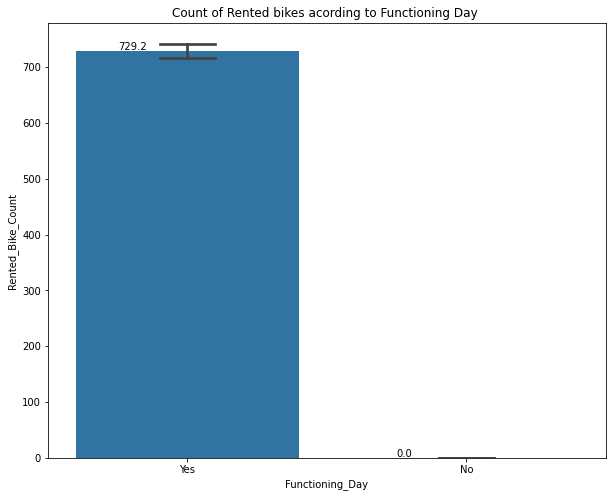

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=DF1,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()


## > **Peoples dont use reneted bikes in no functioning day.** 

# **5.According to session**

---


 


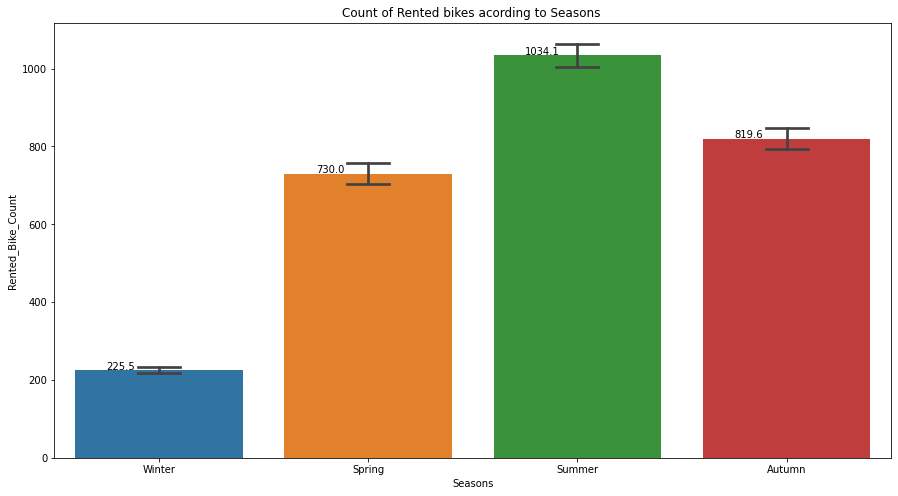

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=DF1,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

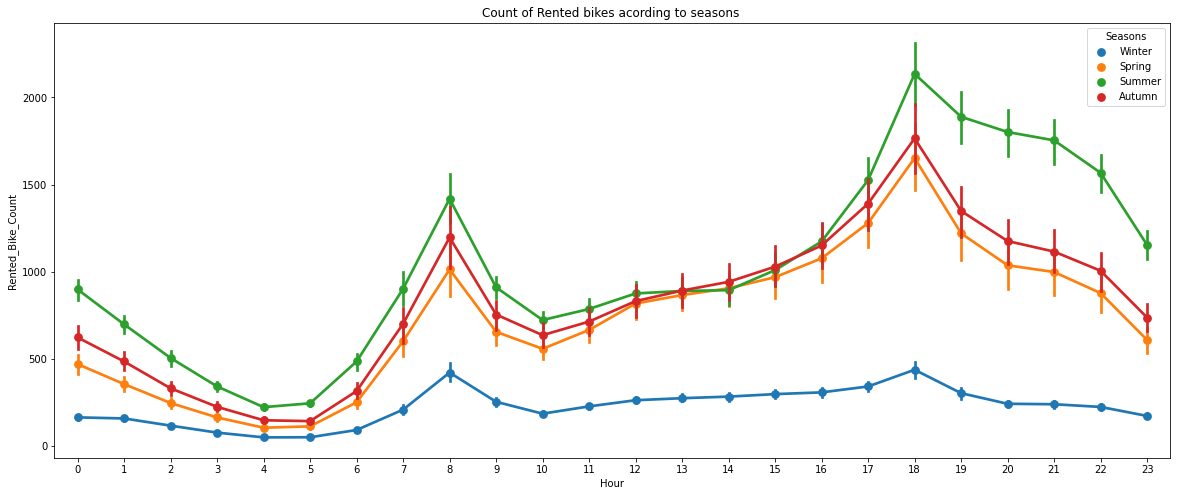

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=DF1,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')



**1.   In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.**

**2.   In winter season the use of rented bike is very low because of snowfall**



# **6. Holiday Analysis**

---



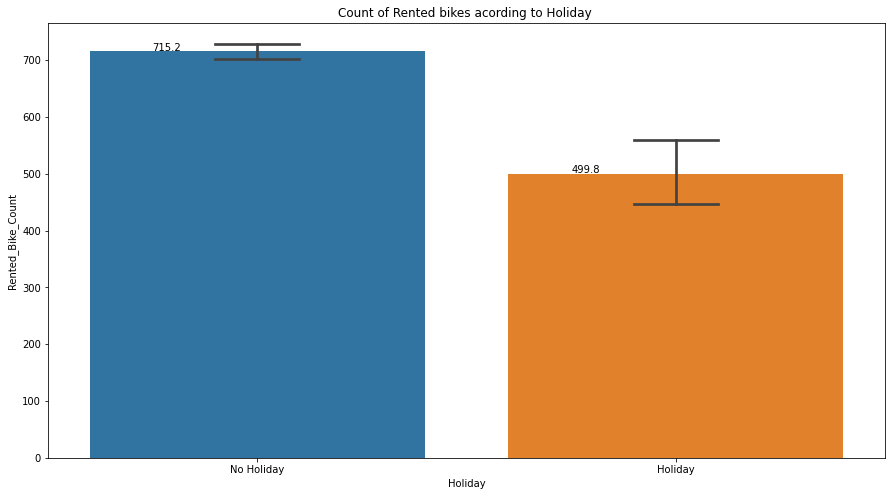

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=DF1,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

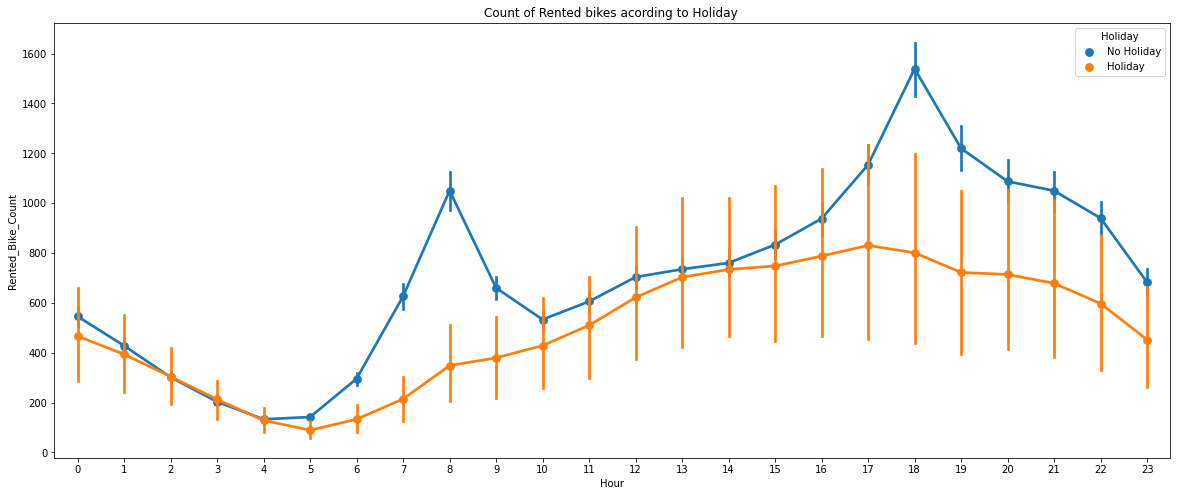

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=DF1,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')


## **Plot shows that in holiday people uses the rented bike from 2pm-8pm**

---



# **Correlation matrix**

In [ ]:
DF1.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

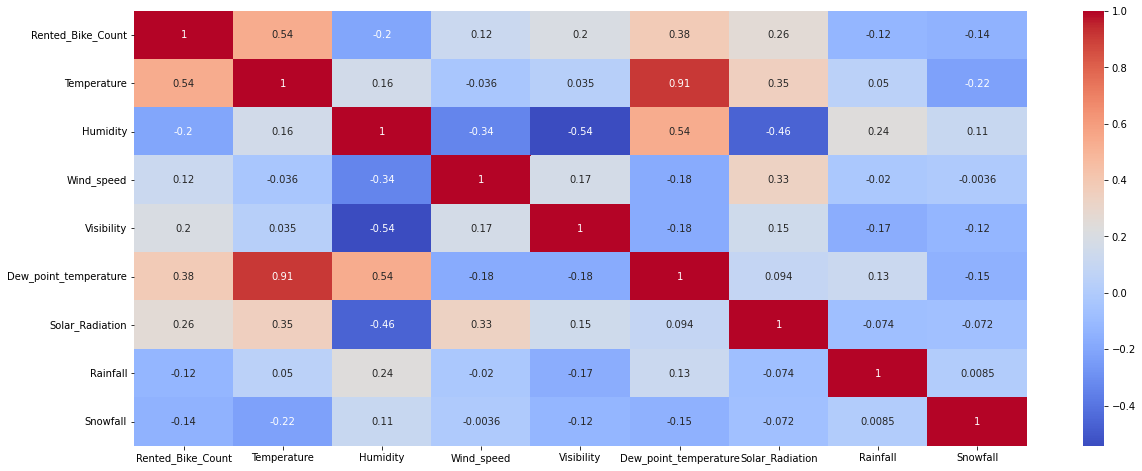

In [ ]:
corr=DF1.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True,cmap='coolwarm')


In [ ]:
#drop the Dew point temperature column
DF1=DF1.drop(['Dew_point_temperature'],axis=1)

In [ ]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

# **one hot encoding**

In [ ]:
#Assign all catagoriacla features to a variable
categorical_features=list(DF1.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
#creat a copy
DF1_copy = DF1

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    DF1_copy = one_hot_encoding(DF1_copy, col)
DF1_copy.head()  

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Modelling training the dataset**

# **Split the dataset into train and test in the ratio of 70:30**

In [ ]:
 
#Assign the value in X and Y
X = DF1_copy.drop(columns=['Rented_Bike_Count'], axis=1)
Y = np.sqrt(DF1_copy['Rented_Bike_Count'])

In [ ]:
X.head()


,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
DF1_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

# **LINEAR REGRESSION**

# **Regression plot**

In [ ]:
#assign the numerical coulmn to variavle
numerical_columns=list(DF1.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

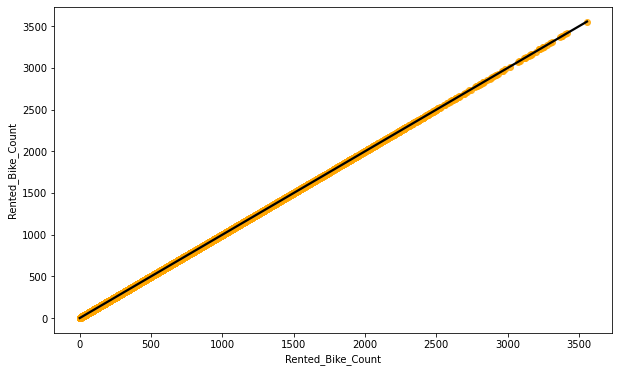

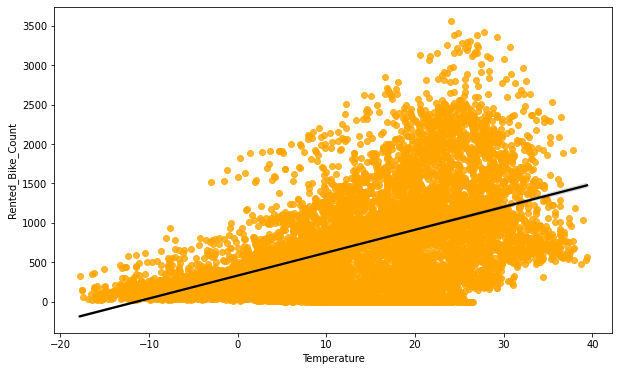

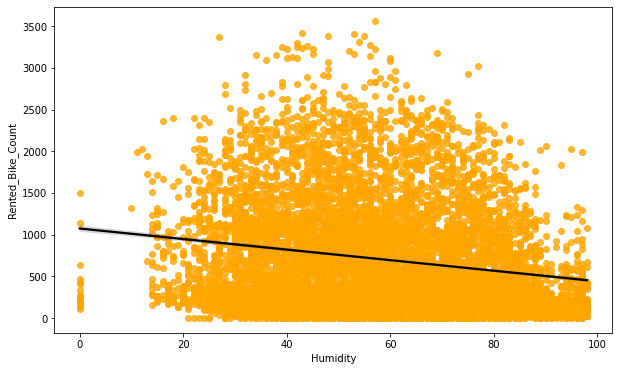

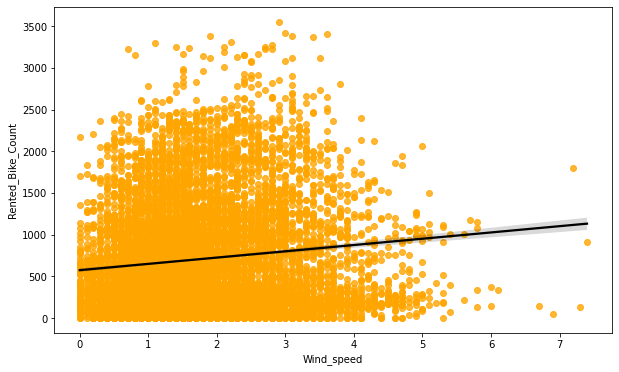

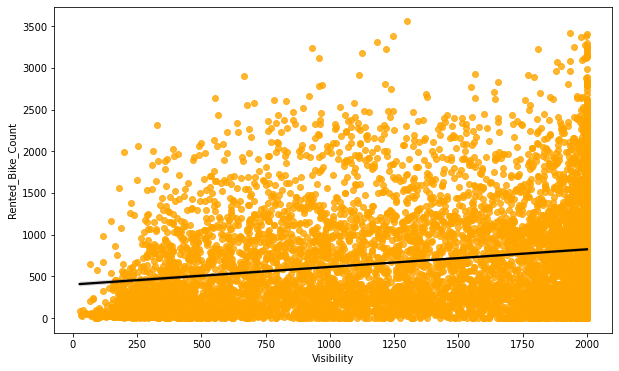

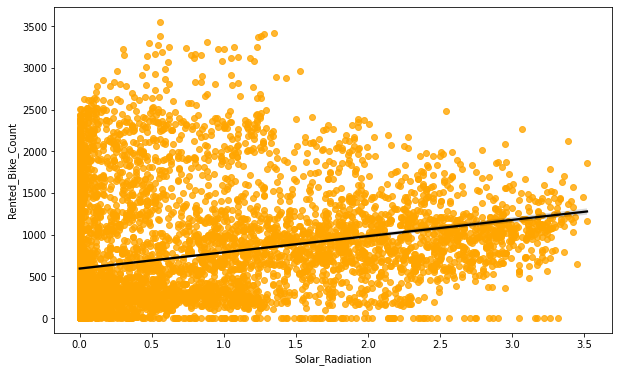

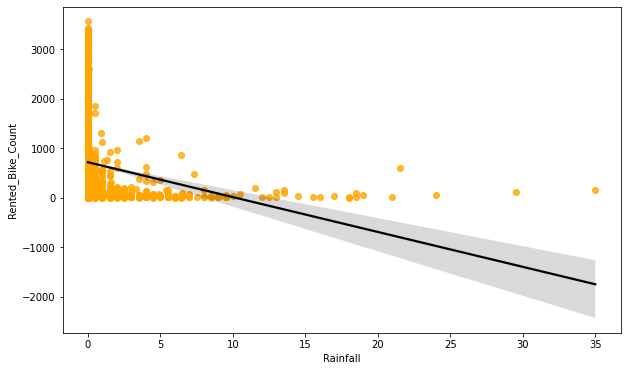

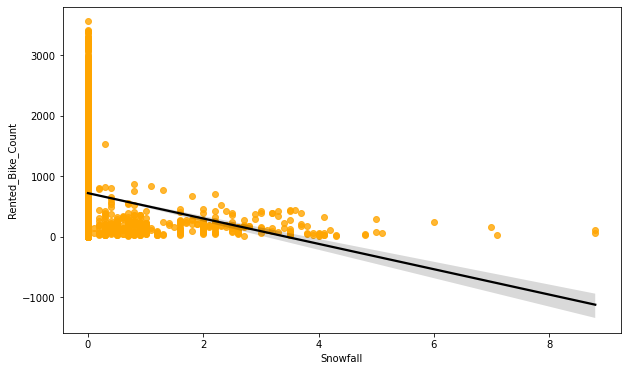

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=DF1[col],y=DF1['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

**1.From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable**

**2.Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.** 

# **Providing the range of values for hyperparameters such as Number of trees:**  

In [ ]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

# **Implementation of regression model**

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, Y_train)

In [ ]:
#check the score
reg.score(X_train, Y_train)

0.7722101548255267

In [ ]:
print("Model Score:",reg.score(X_test,Y_test))

Model Score: 0.7893518482962683


In [ ]:
#check the coefficeint
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [ ]:
#get the X_train and X-test value
Y_pred_train=reg.predict(X_train)
Y_pred_test=reg.predict(X_test)

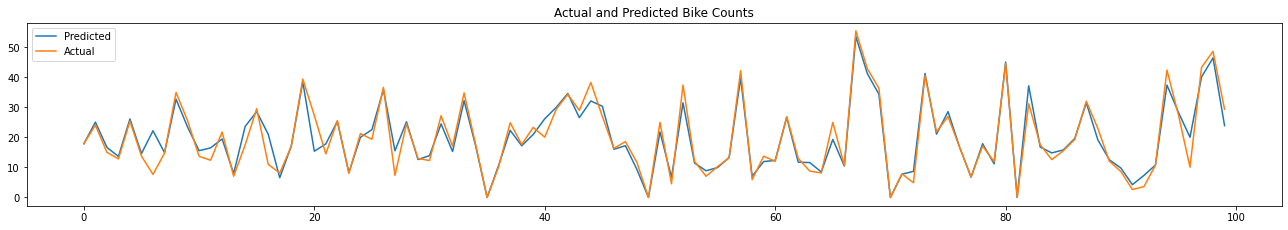

In [ ]:
# Plotting actual and predicted values and the feature importances:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((Y_train), (Y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(Y_train, Y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(Y_train, Y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(Y_train, Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


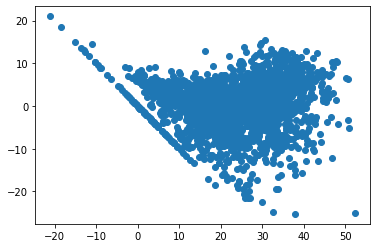

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_test),(Y_test)-(Y_pred_test))

# **LASSO REGRESSION**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, Y_train)
# Create the model score
print(lasso.score(X_test, Y_test), lasso.score(X_train, Y_train))

0.3873692800799008 0.40519624904934015


In [ ]:
#get the X_train and X-test value
Y_pred_train_lasso=lasso.predict(X_train)
Y_pred_test_lasso=lasso.predict(X_test)

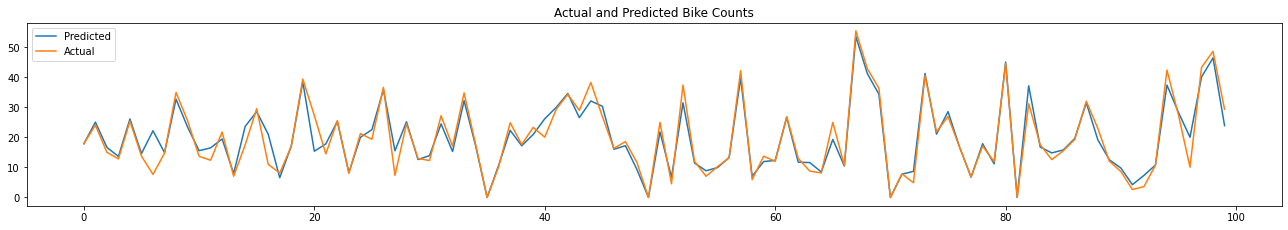

In [ ]:
# Plotting actual and predicted values and the feature importances:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((Y_train), (Y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(Y_train, Y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(Y_train, Y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


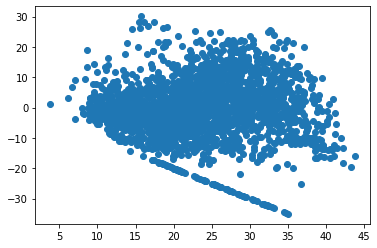

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_test_lasso),(Y_test-Y_pred_test_lasso))

# **RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, Y_train)

0.7722100789802107

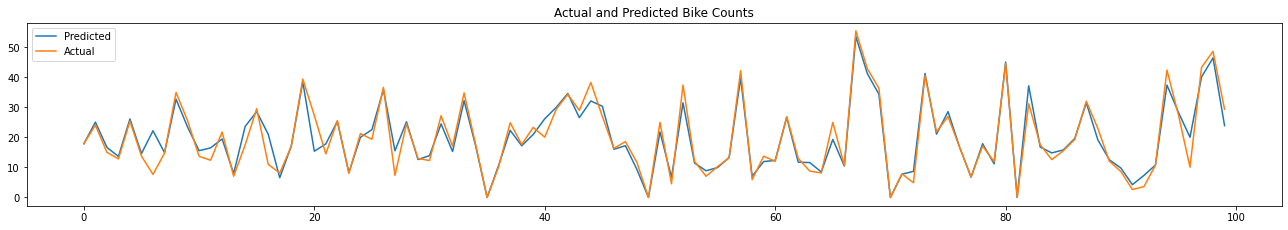

In [ ]:
# Plotting actual and predicted values and the feature importances:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()

In [ ]:
#get the X_train and X-test value
Y_pred_train_ridge=ridge.predict(X_train)
Y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((Y_train), (Y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(Y_train, Y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(Y_train, Y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(Y_train, Y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


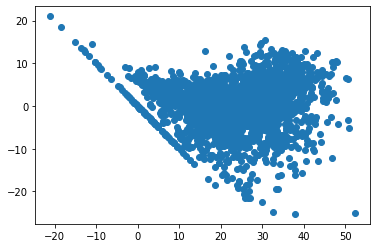

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_test_ridge),(Y_test)-(Y_pred_test_ridge))

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

Y_pred_train_r = rf_model.predict(X_train)
Y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,Y_train))

Model Score: 0.9896812482793095


In [ ]:
print("Model Score:",rf_model.score(X_test,Y_test))

Model Score: 0.9197233016503474


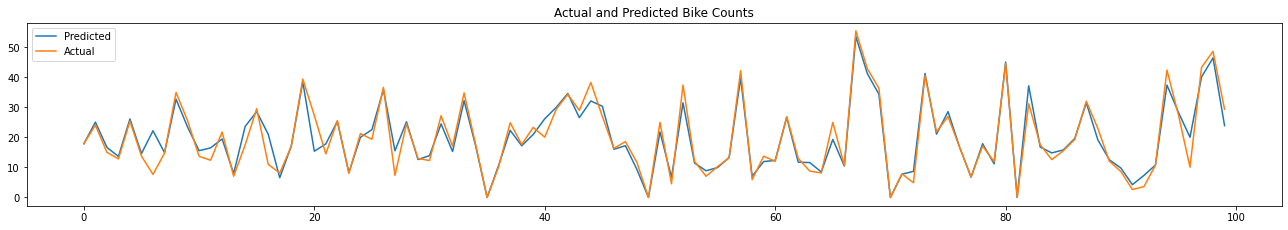

In [ ]:
# Plotting actual and predicted values and the feature importances:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((Y_pred)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.tight_layout()
plt.show()

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,Y_train))

#calculate MSE
MSE_rf= mean_squared_error(Y_train, Y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_train, Y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(Y_train, Y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(Y_train, Y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9896812482793095
MSE : 1.5889915818255163
RMSE : 1.2605520940546313
MAE : 0.7979846865376268
R2 : 0.9896812482793095
Adjusted R2 : 0.9894548330921608


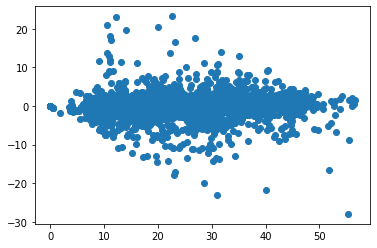

In [ ]:
### Heteroscadacity
plt.scatter((Y_pred_test_r),(Y_test)-(Y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([3.11256665e-01, 1.60678296e-01, 1.17371717e-02, 1.19738706e-02,
       3.36422342e-02, 2.86923481e-02, 1.46333382e-03, 4.64043790e-03,
       1.29490516e-02, 2.01115187e-02, 2.77110758e-02, 2.44700353e-02,
       7.99468802e-03, 4.44712866e-03, 1.39396113e-02, 1.00489800e-03,
       2.31213841e-03, 1.12398808e-03, 2.80788832e-04, 2.93737266e-04,
       3.96514293e-04, 1.50172437e-03, 3.51124975e-03, 1.04662923e-02,
       3.07616147e-02, 1.72242151e-02, 1.31713303e-02, 1.37324201e-02,
       1.06266011e-02, 4.39551894e-03, 4.13300040e-03, 9.09645978e-04,
       9.49603402e-03, 4.14961341e-03, 1.53793596e-01, 2.88173986e-04,
       3.86766463e-03, 1.19063565e-03, 1.53970764e-03, 2.40737126e-03,
       5.27002919e-04, 1.98391740e-03, 9.08997736e-04, 2.83468409e-03,
       4.80044905e-03, 7.75982919e-04, 1.98830251e-02])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
10,Hour_4,0.03
4,Solar_Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
25,Hour_19,0.02
11,Hour_5,0.02
46,weekdays_weekend_1,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

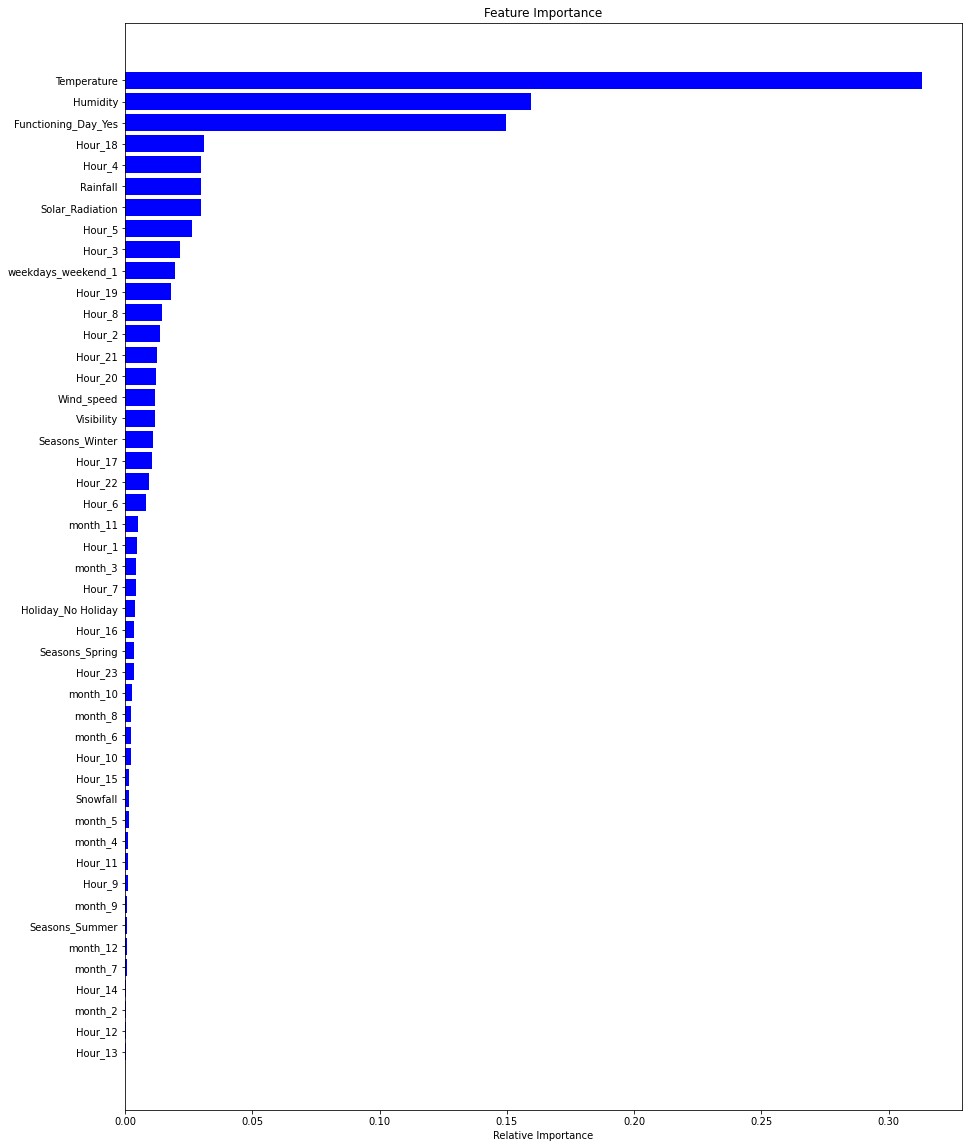

In [ ]:
#Plot the figure
plt.figure(figsize=(15,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
X_test.iloc[-1, :]

Temperature              28.30
Humidity                 43.00
Wind_speed                1.60
Visibility             1941.00
Solar_Radiation           3.33
Rainfall                  0.00
Snowfall                  0.00
Hour_1                    0.00
Hour_2                    0.00
Hour_3                    0.00
Hour_4                    0.00
Hour_5                    0.00
Hour_6                    0.00
Hour_7                    0.00
Hour_8                    0.00
Hour_9                    0.00
Hour_10                   0.00
Hour_11                   0.00
Hour_12                   0.00
Hour_13                   0.00
Hour_14                   1.00
Hour_15                   0.00
Hour_16                   0.00
Hour_17                   0.00
Hour_18                   0.00
Hour_19                   0.00
Hour_20                   0.00
Hour_21                   0.00
Hour_22                   0.00
Hour_23                   0.00
Seasons_Spring            0.00
Seasons_Summer            1.00
Seasons_

In [ ]:
#predected value of bike count
rf_model.predict([X_test.iloc[-1, :]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([38.08654993])

In [ ]:
#Actual value of bike count
Y_test.iloc[-1]

37.815340802378074

In [ ]:
Y_pred = rf_model.predict(X_test)
Y_pred


array([17.88834895, 25.08401653, 16.6821318 , ..., 30.79006014,
        0.        , 38.08654993])

In [ ]:
Y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented_Bike_Count, Length: 2190, dtype: float64

# **Accuracy of model**

---



---



In [ ]:
print("Model Score:",reg.score(X_test,Y_test))

Model Score: 0.7893518482962683


In [ ]:
print("Model Score:",lasso.score(X_test,Y_test))

Model Score: 0.3873692800799008


In [ ]:
print("Model Score:",reg.score(X_test,Y_test))

Model Score: 0.7893518482962683


In [ ]:
print("Model Score:",rf_model.score(X_test,Y_test))

Model Score: 0.9205756236683686


# **Conclusion**

---



---



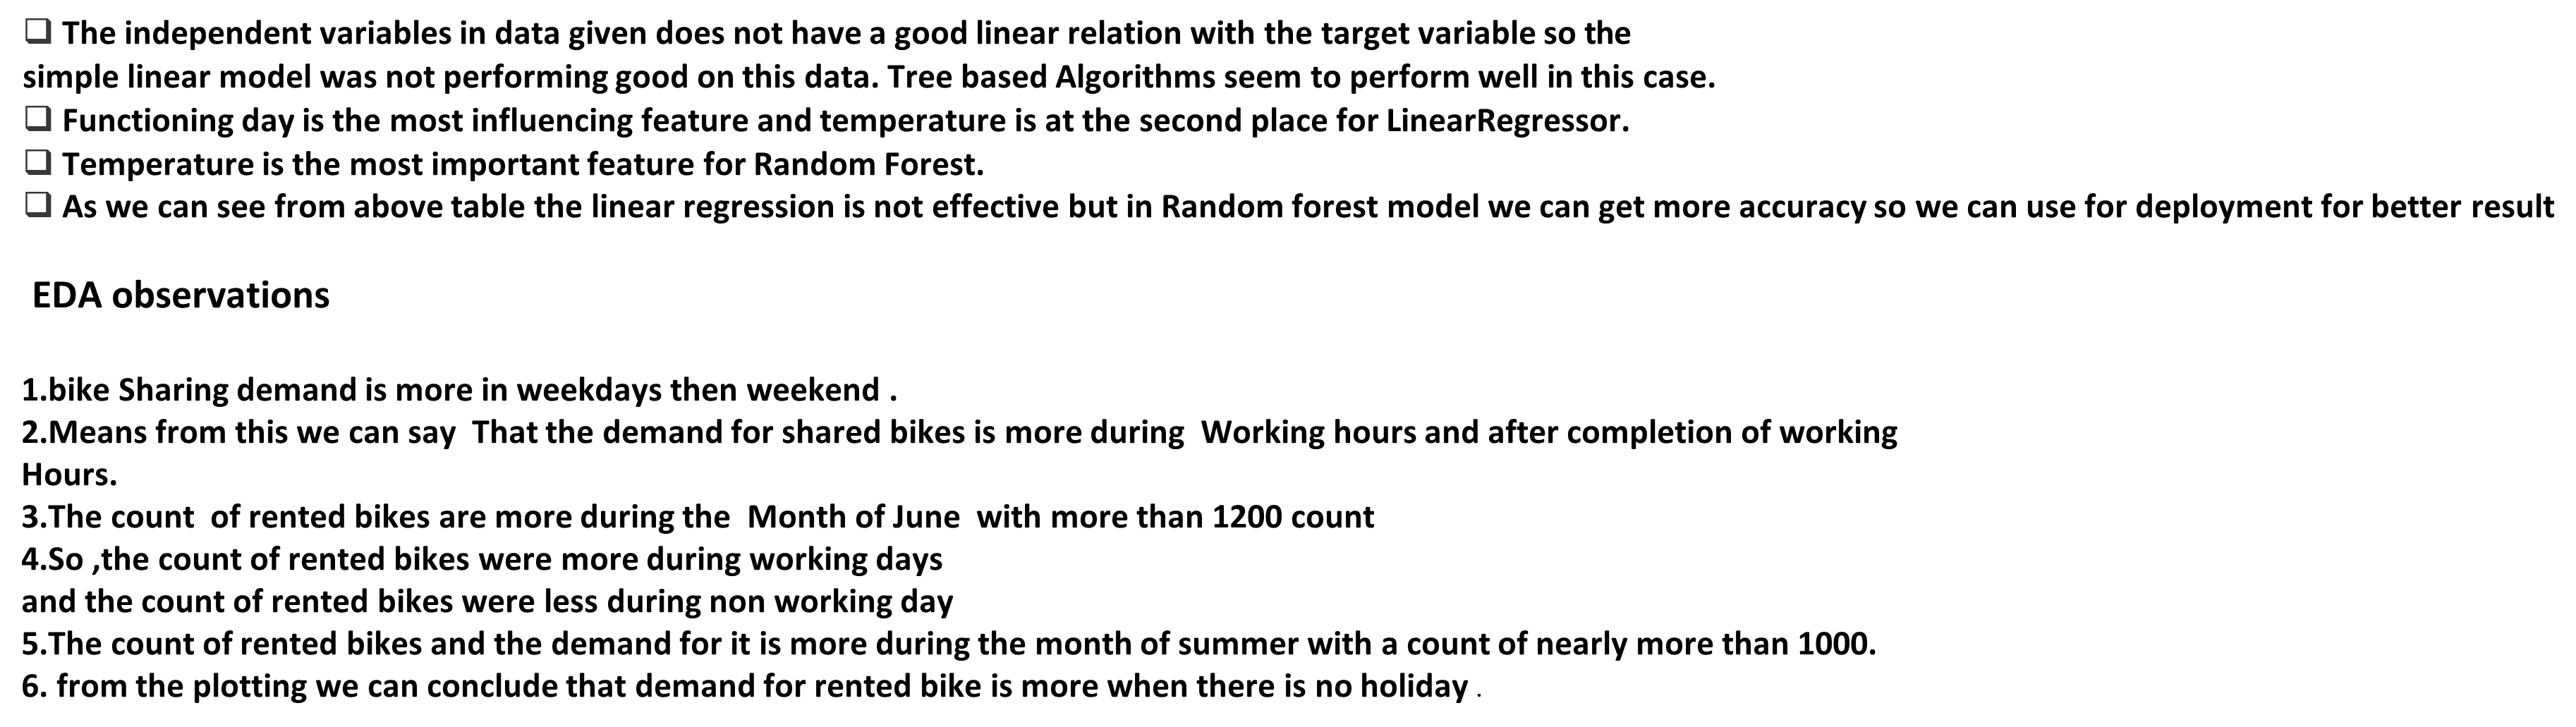